# Task 2: Quantitative Analysis using PyNance and TA-Lib
## 📊 Comprehensive Financial & Technical Analysis
This notebook performs quantitative analysis on stock price data using:
- **TA-Lib**: Technical indicators (RSI, MACD, Bollinger Bands, etc.)
- **PyNance**: Financial metrics (Sharpe ratio, VaR, CVaR, etc.)
- **Custom Analytics**: Portfolio analysis and visualization

### Available Stock Data:
- AAPL (Apple Inc.)
- AMZN (Amazon.com Inc.)
- GOOG (Alphabet Inc.)
- META (Meta Platforms Inc.)
- MSFT (Microsoft Corporation)
- NVDA (NVIDIA Corporation)
- TSLA (Tesla Inc.)

## 📦 Installation Commands
Run these commands in your terminal before executing the notebook:
# Install TA-Lib (may require additional system dependencies)
# Install TA-Lib (may require additional system dependencies)
pip install TA-Lib
# pip install --find-links https://github.com/cgohlke/talib-build/releases TA-Lib
# Install PyNance
pip install pynance
# Install additional packages
pip install yfinance plotly cufflinks mplfinance scipy
# Or install all at once:
pip install -r requirements.txt
**Note**: TA-Lib installation can be complex on some systems. If you encounter issues, the notebook includes fallback calculations.

In [1]:
# Import necessary libraries
import sys
import os
# Add src directory to path
sys.path.append(os.path.join('..', 'src'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import json
from datetime import datetime
# Set up plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print("📊 Environment setup complete!")
print(f"🐍 Python version: {sys.version.split()[0]}")
print(f"🐼 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

📊 Environment setup complete!
🐍 Python version: 3.12.4
🐼 Pandas version: 2.2.3
🔢 NumPy version: 2.2.6


In [2]:
# Import our custom modules
try:
    from data_loader import FinancialDataLoader
    from technical_analyzer import TechnicalAnalyzer
    from financial_metrics_analyzer import FinancialMetricsAnalyzer
    print("✅ All custom modules imported successfully!")
except ImportError as e:
    print(f"❌ Error importing modules: {e}")
    print("Please ensure you're running this notebook from the correct directory.")

✅ All custom modules imported successfully!


## 📂 Step 1: Load and Prepare Data

In [3]:
# Initialize data loader
data_loader = FinancialDataLoader("../data/yfinance_data")
# Load all stock data
stock_data = data_loader.load_all_stocks()
# Display summary
if stock_data:
    print(f"\n📈 Successfully loaded {len(stock_data)} stocks:")
    for ticker in data_loader.tickers:
        data = data_loader.get_stock_data(ticker)
        print(f"   {ticker}: {len(data)} records ({data.index.min().date()} to {data.index.max().date()})")
else:
    print("❌ No data loaded. Please check the data directory path.")

📂 Loading stock data from ../data/yfinance_data...
✅ Loaded AAPL: 10998 records
✅ Loaded AMZN: 6846 records
✅ Loaded GOOG: 5020 records
✅ Loaded META: 2926 records
✅ Loaded MSFT: 9672 records
✅ Loaded NVDA: 6421 records
✅ Loaded TSLA: 3545 records
📊 Successfully loaded 7 stocks: AAPL, AMZN, GOOG, META, MSFT, NVDA, TSLA

📈 Successfully loaded 7 stocks:
   AAPL: 10998 records (1980-12-12 to 2024-07-30)
   AMZN: 6846 records (1997-05-15 to 2024-07-30)
   GOOG: 5020 records (2004-08-19 to 2024-07-30)
   META: 2926 records (2012-12-12 to 2024-07-30)
   MSFT: 9672 records (1986-03-13 to 2024-07-30)
   NVDA: 6421 records (1999-01-22 to 2024-07-30)
   TSLA: 3545 records (2010-06-29 to 2024-07-30)


In [4]:
# Get summary statistics for all stocks
summary_stats = data_loader.get_summary_statistics()
print("📊 Summary Statistics:")
display(summary_stats.round(4))

📊 Summary Statistics:


,Ticker,Start_Date,End_Date,Total_Days,Current_Price,Max_Price,Min_Price,Total_Return,Avg_Daily_Return,Daily_Volatility,Annualized_Volatility,Max_Drawdown,Avg_Volume,Sharpe_Ratio
0,AAPL,1980-12-12,2024-07-30,10998,218.80,234.82,0.0491,1703.7404,0.0011,0.0279,0.4428,-0.8222,3.180806e+08,0.5652
1,AMZN,1997-05-15,2024-07-30,6846,181.71,200.00,0.0698,1854.7555,0.0017,0.0354,0.5624,-0.9440,1.380713e+08,0.7333
2,GOOG,2004-08-19,2024-07-30,5020,171.86,192.66,2.4909,67.7678,0.0010,0.0193,0.3067,-0.6529,1.157539e+08,0.7800
3,META,2012-12-12,2024-07-30,2926,463.19,539.91,22.9000,15.7944,0.0013,0.0243,0.3854,-0.7674,2.872083e+07,0.7718
4,MSFT,1986-03-13,2024-07-30,9672,422.92,467.56,0.0903,4349.0444,0.0011,0.0211,0.3354,-0.7456,5.677678e+07,0.7599
5,NVDA,1999-01-22,2024-07-30,6421,103.73,135.58,0.0341,2528.0131,0.0019,0.0379,0.6011,-0.8972,6.060791e+08,0.7769
6,TSLA,2010-06-29,2024-07-30,3545,222.62,409.97,1.0533,138.7781,0.0020,0.0359,0.5694,-0.7363,9.699708e+07,0.8654


In [5]:
# Data quality report
quality_report = data_loader.get_data_quality_report()
print("📋 Data Quality Report:")
print(f"Total Stocks: {quality_report['total_stocks']}")
print(f"Date Range: {quality_report['date_range']['earliest'].date()} to {quality_report['date_range']['latest'].date()}")
print(f"Total Days: {quality_report['date_range']['total_days']}")

📋 Data Quality Report:
Total Stocks: 7
Date Range: 1980-12-12 to 2024-07-30
Total Days: 15936


## 📈 Step 2: Technical Analysis with TA-Lib
Let's start by analyzing a single stock with comprehensive technical indicators.

In [6]:
# Select a stock for detailed analysis
selected_ticker = "AAPL"
# Get the data
stock_data_sample = data_loader.get_stock_data(selected_ticker)
if not stock_data_sample.empty:
    print(f"📊 Analyzing {selected_ticker}...")
    print(f"Data range: {stock_data_sample.index.min().date()} to {stock_data_sample.index.max().date()}")
    print(f"Total records: {len(stock_data_sample)}")
    
    # Display basic info
    print(f"\n💰 Current Price: ${stock_data_sample['Close'].iloc[-1]:.2f}")
    total_return = ((stock_data_sample['Close'].iloc[-1] / stock_data_sample['Close'].iloc[0]) - 1) * 100
    print(f"📈 Total Return: {total_return:.2f}%")
    
    # Show recent data
    print("\n📋 Recent Data:")
    display(stock_data_sample[['Open', 'High', 'Low', 'Close', 'Volume']].tail())
else:
    print(f"❌ No data found for {selected_ticker}")

📊 Analyzing AAPL...
Data range: 1980-12-12 to 2024-07-30
Total records: 10998

💰 Current Price: $218.80
📈 Total Return: 170374.04%

📋 Recent Data:


,Open,High,Low,Close,Volume
Date,,,,,
2024-07-24,224.000000,224.800003,217.130005,218.539993,61777600
2024-07-25,218.929993,220.850006,214.619995,217.490005,51391200
2024-07-26,218.699997,219.490005,216.009995,217.960007,41601300
2024-07-29,216.960007,219.300003,215.750000,218.240005,36311800
2024-07-30,219.190002,220.330002,216.119995,218.800003,41643800


In [7]:
# Initialize technical analyzer
tech_analyzer = TechnicalAnalyzer(stock_data_sample.copy())
# Calculate comprehensive technical analysis
print("🔧 Calculating comprehensive technical indicators...")

try:
    # Calculate individual indicators
    print("📈 Calculating Moving Averages...")
    ma_data = tech_analyzer.calculate_moving_averages([5, 10, 20, 50, 100, 200])
    
    print("📊 Calculating Momentum Indicators...")
    rsi = tech_analyzer.calculate_rsi(14)
    macd_data = tech_analyzer.calculate_macd()
    
    print("📉 Calculating Volatility Indicators...")
    bb_data = tech_analyzer.calculate_bollinger_bands()
    stoch_data = tech_analyzer.calculate_stochastic_oscillator()
    atr = tech_analyzer.calculate_atr(14)
    
    
    
    print("✅ Technical Analysis Complete!\n")

    # --- Summary Output ---
    print("📊 Technical Analysis Results Summary:")
    print(f"   • Moving Averages: {len(ma_data)} records with "
          f"{len([col for col in ma_data.columns if 'SMA' in col])} indicators")
    print(f"   • RSI (14-day): Latest value = {rsi.iloc[-1]:.2f}")
    print(f"   • MACD: Latest MACD = {macd_data['MACD'].iloc[-1]:.2f}, "
          f"Signal = {macd_data['MACD_Signal'].iloc[-1]:.2f}")
    print(f"   • Bollinger Bands: Latest Close = ${stock_data_sample['Close'].iloc[-1]:.2f}, "
          f"BB Upper = ${bb_data['BB_Upper'].iloc[-1]:.2f}, BB Lower = ${bb_data['BB_Lower'].iloc[-1]:.2f}")
    print(f"   • Stochastic %K = {stoch_data['Stoch_K'].iloc[-1]:.2f}, "
          f"%D = {stoch_data['Stoch_D'].iloc[-1]:.2f}")
    print(f"   • ATR (14-day): Latest value = {atr.iloc[-1]:.2f}")

    # --- Create a combined DataFrame of key indicators ---
    key_indicators = pd.DataFrame({
        'Close': stock_data_sample['Close'],
        'SMA_20': ma_data['SMA_20'],
        'SMA_50': ma_data['SMA_50'],
        'RSI_14': rsi,
        'MACD': macd_data['MACD'],
        'BB_Upper': bb_data['BB_Upper'],
        'BB_Lower': bb_data['BB_Lower']
    })

    # Display recent technical indicator values
    display(key_indicators.tail())

    # Store results for later use
    technical_analysis = {
        'moving_averages': ma_data,
        'rsi': rsi,
        'macd': macd_data,
        'bollinger_bands': bb_data,
        'stochastic': stoch_data,
        'atr': atr,
        'combined_indicators': key_indicators
    }

except Exception as e:
    print(f"❌ Error in technical analysis: {str(e)}")
    import traceback
    traceback.print_exc()

Data prepared: 10998 records from 1980-12-12 00:00:00 to 2024-07-30 00:00:00
🔧 Calculating comprehensive technical indicators...
📈 Calculating Moving Averages...
📊 Calculating Momentum Indicators...
📉 Calculating Volatility Indicators...
✅ Technical Analysis Complete!

📊 Technical Analysis Results Summary:
   • Moving Averages: 10998 records with 6 indicators
   • RSI (14-day): Latest value = 49.36
   • MACD: Latest MACD = 2.01, Signal = 4.30
   • Bollinger Bands: Latest Close = $218.80, BB Upper = $236.00, BB Lower = $214.23
   • Stochastic %K = 16.42, %D = 14.14
   • ATR (14-day): Latest value = 5.06


,Close,SMA_20,SMA_50,RSI_14,MACD,BB_Upper,BB_Lower
Date,,,,,,,
2024-07-24,218.539993,224.228500,208.474199,48.687742,4.662717,237.809121,210.647878
2024-07-25,217.490005,224.440500,209.098399,47.386437,3.748082,237.449323,211.431677
2024-07-26,217.960007,224.633500,209.709000,48.055700,3.026267,237.127285,212.139714
2024-07-29,218.240005,225.014500,210.279400,48.476184,2.448591,236.168590,213.860411
2024-07-30,218.800003,225.117001,210.858600,49.359115,2.012764,235.999799,214.234202


In [8]:
# Display current technical indicators
print(f"🔍 Current Technical Indicators for {selected_ticker}:")
print("=" * 50)

# Moving Averages
if 'moving_averages' in technical_analysis:
    ma_data = technical_analysis['moving_averages']
    if not ma_data.empty:
        current_price = ma_data['Close'].iloc[-1]
        print(f"💰 Current Price: ${current_price:.2f}")
        
        for col in ma_data.columns:
            if 'SMA' in col:
                ma_value = ma_data[col].iloc[-1]
                if not pd.isna(ma_value):
                    trend = "📈 Above" if current_price > ma_value else "📉 Below"
                    print(f"{col}: ${ma_value:.2f} ({trend})")

# RSI
if 'rsi' in technical_analysis and not technical_analysis['rsi'].empty:
    rsi_current = technical_analysis['rsi'].iloc[-1]
    if rsi_current > 70:
        rsi_signal = "🔴 Overbought"
    elif rsi_current < 30:
        rsi_signal = "🟢 Oversold"
    else:
        rsi_signal = "🟡 Neutral"
    print(f"\n📊 RSI: {rsi_current:.2f} {rsi_signal}")

# MACD
if 'macd' in technical_analysis:
    macd_data = technical_analysis['macd']
    if not macd_data.empty:
        macd_current = macd_data['MACD'].iloc[-1]
        signal_current = macd_data['MACD_Signal'].iloc[-1]
        histogram_current = macd_data['MACD_Histogram'].iloc[-1]
        
        macd_trend = "📈 Bullish" if macd_current > signal_current else "📉 Bearish"
        print(f"\n📈 MACD: {macd_current:.4f}")
        print(f"📊 Signal: {signal_current:.4f}")
        print(f"📊 Histogram: {histogram_current:.4f} {macd_trend}")

🔍 Current Technical Indicators for AAPL:
💰 Current Price: $218.80
SMA_5: $218.21 (📈 Above)
SMA_10: $221.74 (📉 Below)
SMA_20: $225.12 (📉 Below)
SMA_50: $210.86 (📈 Above)
SMA_100: $192.28 (📈 Above)
SMA_200: $188.91 (📈 Above)

📊 RSI: 49.36 🟡 Neutral

📈 MACD: 2.0128
📊 Signal: 4.3012
📊 Histogram: -2.2884 📉 Bearish


🔧 Calculating comprehensive technical indicators...
📈 Calculating Moving Averages...
✅ Moving Averages completed
✅ EMA completed
📊 Calculating Momentum Indicators...
✅ RSI completed
✅ MACD completed
✅ Stochastic completed
📉 Calculating Volatility Indicators...
✅ Bollinger Bands completed
✅ ATR completed
📊 Calculating Volume Indicators...
✅ Volume indicators completed
🎯 Calculating Support and Resistance...
✅ Support/Resistance completed
✅ Technical analysis completed successfully!


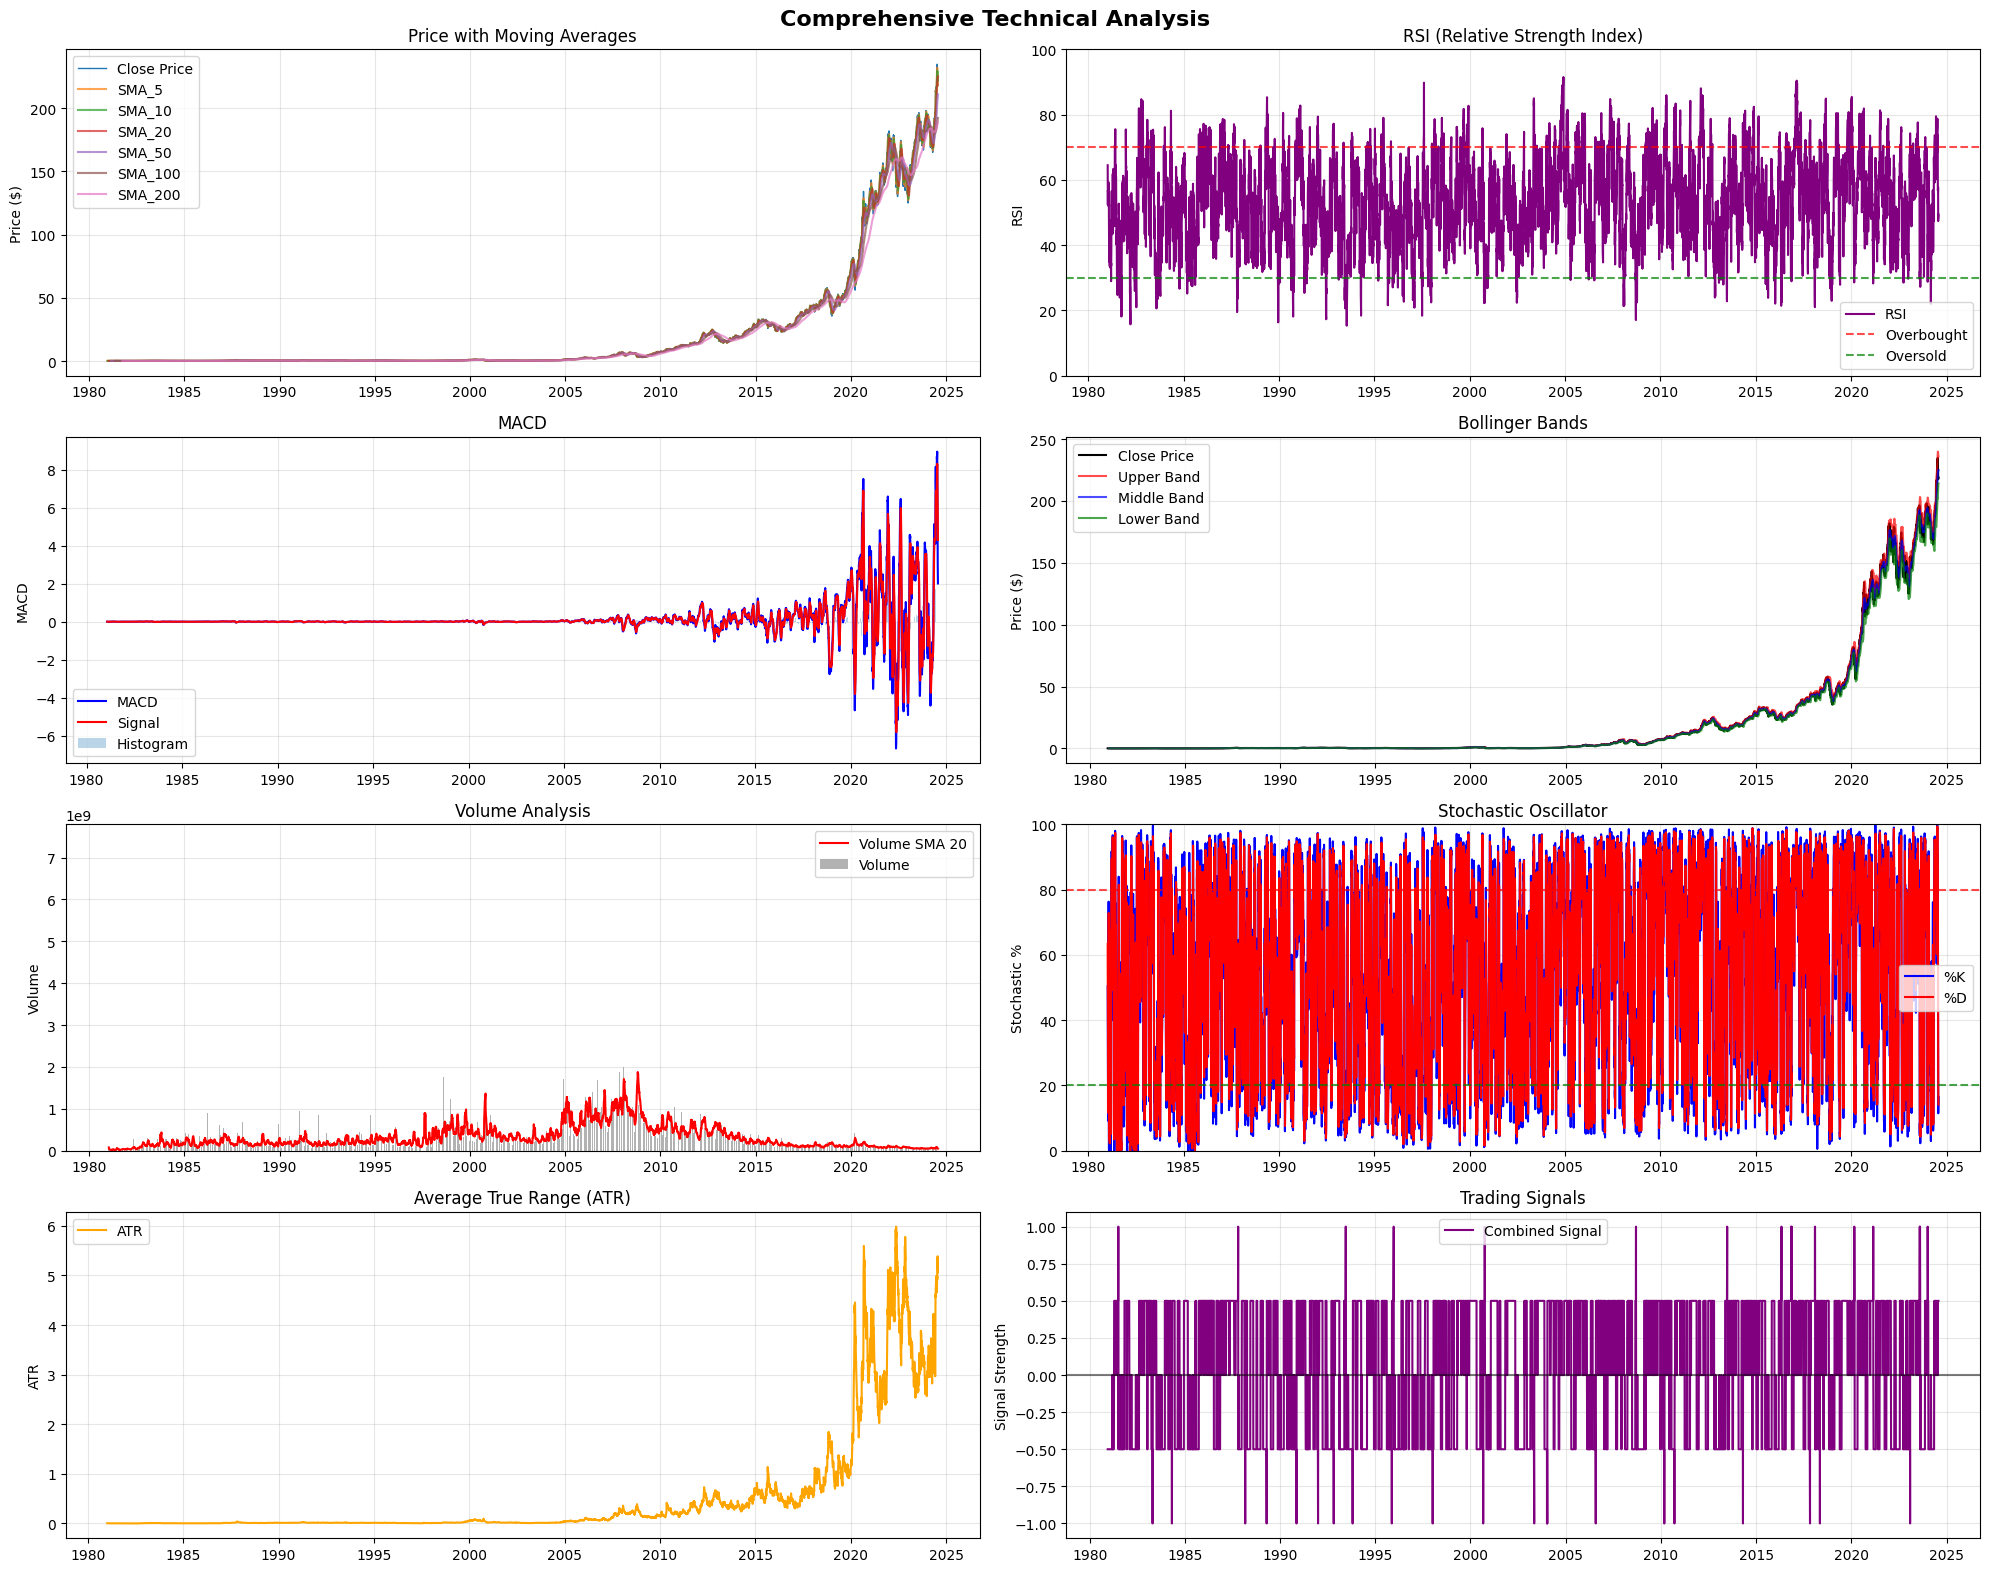

<Figure size 640x480 with 0 Axes>

In [9]:
# Create comprehensive technical analysis visualization
plt.style.use('default')
fig = tech_analyzer.plot_technical_analysis(figsize=(20, 16))
plt.suptitle(f'Technical Analysis - {selected_ticker}', fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## 💰 Step 3: Financial Metrics Analysis with PyNance

In [10]:
# Initialize financial metrics analyzer
finance_analyzer = FinancialMetricsAnalyzer(stock_data_sample.copy())
# Calculate comprehensive financial analysis
financial_analysis = finance_analyzer.get_comprehensive_financial_analysis()

Financial data prepared: 10998 records from 1980-12-12 00:00:00 to 2024-07-30 00:00:00
💰 Performing comprehensive financial analysis...
📊 Calculating performance metrics...
📈 Analyzing returns distribution...
📊 Calculating rolling metrics with 252-day window...
✅ Financial analysis completed successfully!


In [11]:
# Display key financial metrics
if 'performance_metrics' in financial_analysis:
    metrics = financial_analysis['performance_metrics']
    print(f"💰 Financial Performance Metrics for {selected_ticker}:")
    print("=" * 60)
    # Price metrics
    print(f"Current Price: ${metrics['current_price']:.2f}")
    print(f"Price Range: ${metrics['min_price']:.2f} - ${metrics['max_price']:.2f}")
    # Return metrics
    print(f"\n📈 Returns:")
    print(f"Total Return: {metrics['total_return']:.2%}")
    print(f"Annualized Return: {metrics['annualized_return']:.2%}")
    print(f"Average Daily Return: {metrics['average_daily_return']:.4%}")

    # Risk metrics
    print(f"\n⚡ Risk Metrics:")
    print(f"Daily Volatility: {metrics['daily_volatility']:.4%}")
    print(f"Annualized Volatility: {metrics['annualized_volatility']:.2%}")
    print(f"Maximum Drawdown: {metrics['max_drawdown']:.2%}")

    # Risk-adjusted returns
    print(f"\n🎯 Risk-Adjusted Returns:")
    print(f"Sharpe Ratio: {metrics['sharpe_ratio']:.3f}")
    print(f"Sortino Ratio: {metrics['sortino_ratio']:.3f}")
    print(f"Calmar Ratio: {metrics['calmar_ratio']:.3f}")

    # Additional metrics
    print(f"\n📊 Additional Metrics:")
    print(f"Skewness: {metrics['skewness']:.3f}")
    print(f"Kurtosis: {metrics['kurtosis']:.3f}")
    print(f"Positive Days Ratio: {metrics['positive_days_ratio']:.2%}")

    # Streaks
    print(f"\n🏃 Winning/Losing Streaks:")
    print(f"Max Winning Streak: {metrics['max_winning_streak']} days")
    print(f"Max Losing Streak: {metrics['max_losing_streak']} days")
    print(f"Current Streak: {metrics['current_streak']} days")


💰 Financial Performance Metrics for AAPL:
Current Price: $218.80
Price Range: $0.05 - $234.82

📈 Returns:
Total Return: 170374.04%
Annualized Return: 18.60%
Average Daily Return: 0.1073%

⚡ Risk Metrics:
Daily Volatility: 2.7895%
Annualized Volatility: 44.28%
Maximum Drawdown: -82.22%

🎯 Risk-Adjusted Returns:
Sharpe Ratio: 0.375
Sortino Ratio: 0.517
Calmar Ratio: 0.226

📊 Additional Metrics:
Skewness: -0.373
Kurtosis: 18.433
Positive Days Ratio: 49.72%

🏃 Winning/Losing Streaks:
Max Winning Streak: 12 days
Max Losing Streak: 11 days
Current Streak: 3 days


In [12]:
# Display VaR and CVaR
if 'risk_metrics' in financial_analysis:
    risk_metrics = financial_analysis['risk_metrics']
    print("⚠️ Risk Metrics (Value at Risk):")
    print(f"VaR (5%): {risk_metrics['VaR']:.4%} - Maximum expected loss on 95% of days")
    print(f"CVaR (5%): {risk_metrics['CVaR']:.4%} - Average loss when VaR is exceeded")

⚠️ Risk Metrics (Value at Risk):
VaR (5%): -4.0806% - Maximum expected loss on 95% of days
CVaR (5%): -6.1021% - Average loss when VaR is exceeded


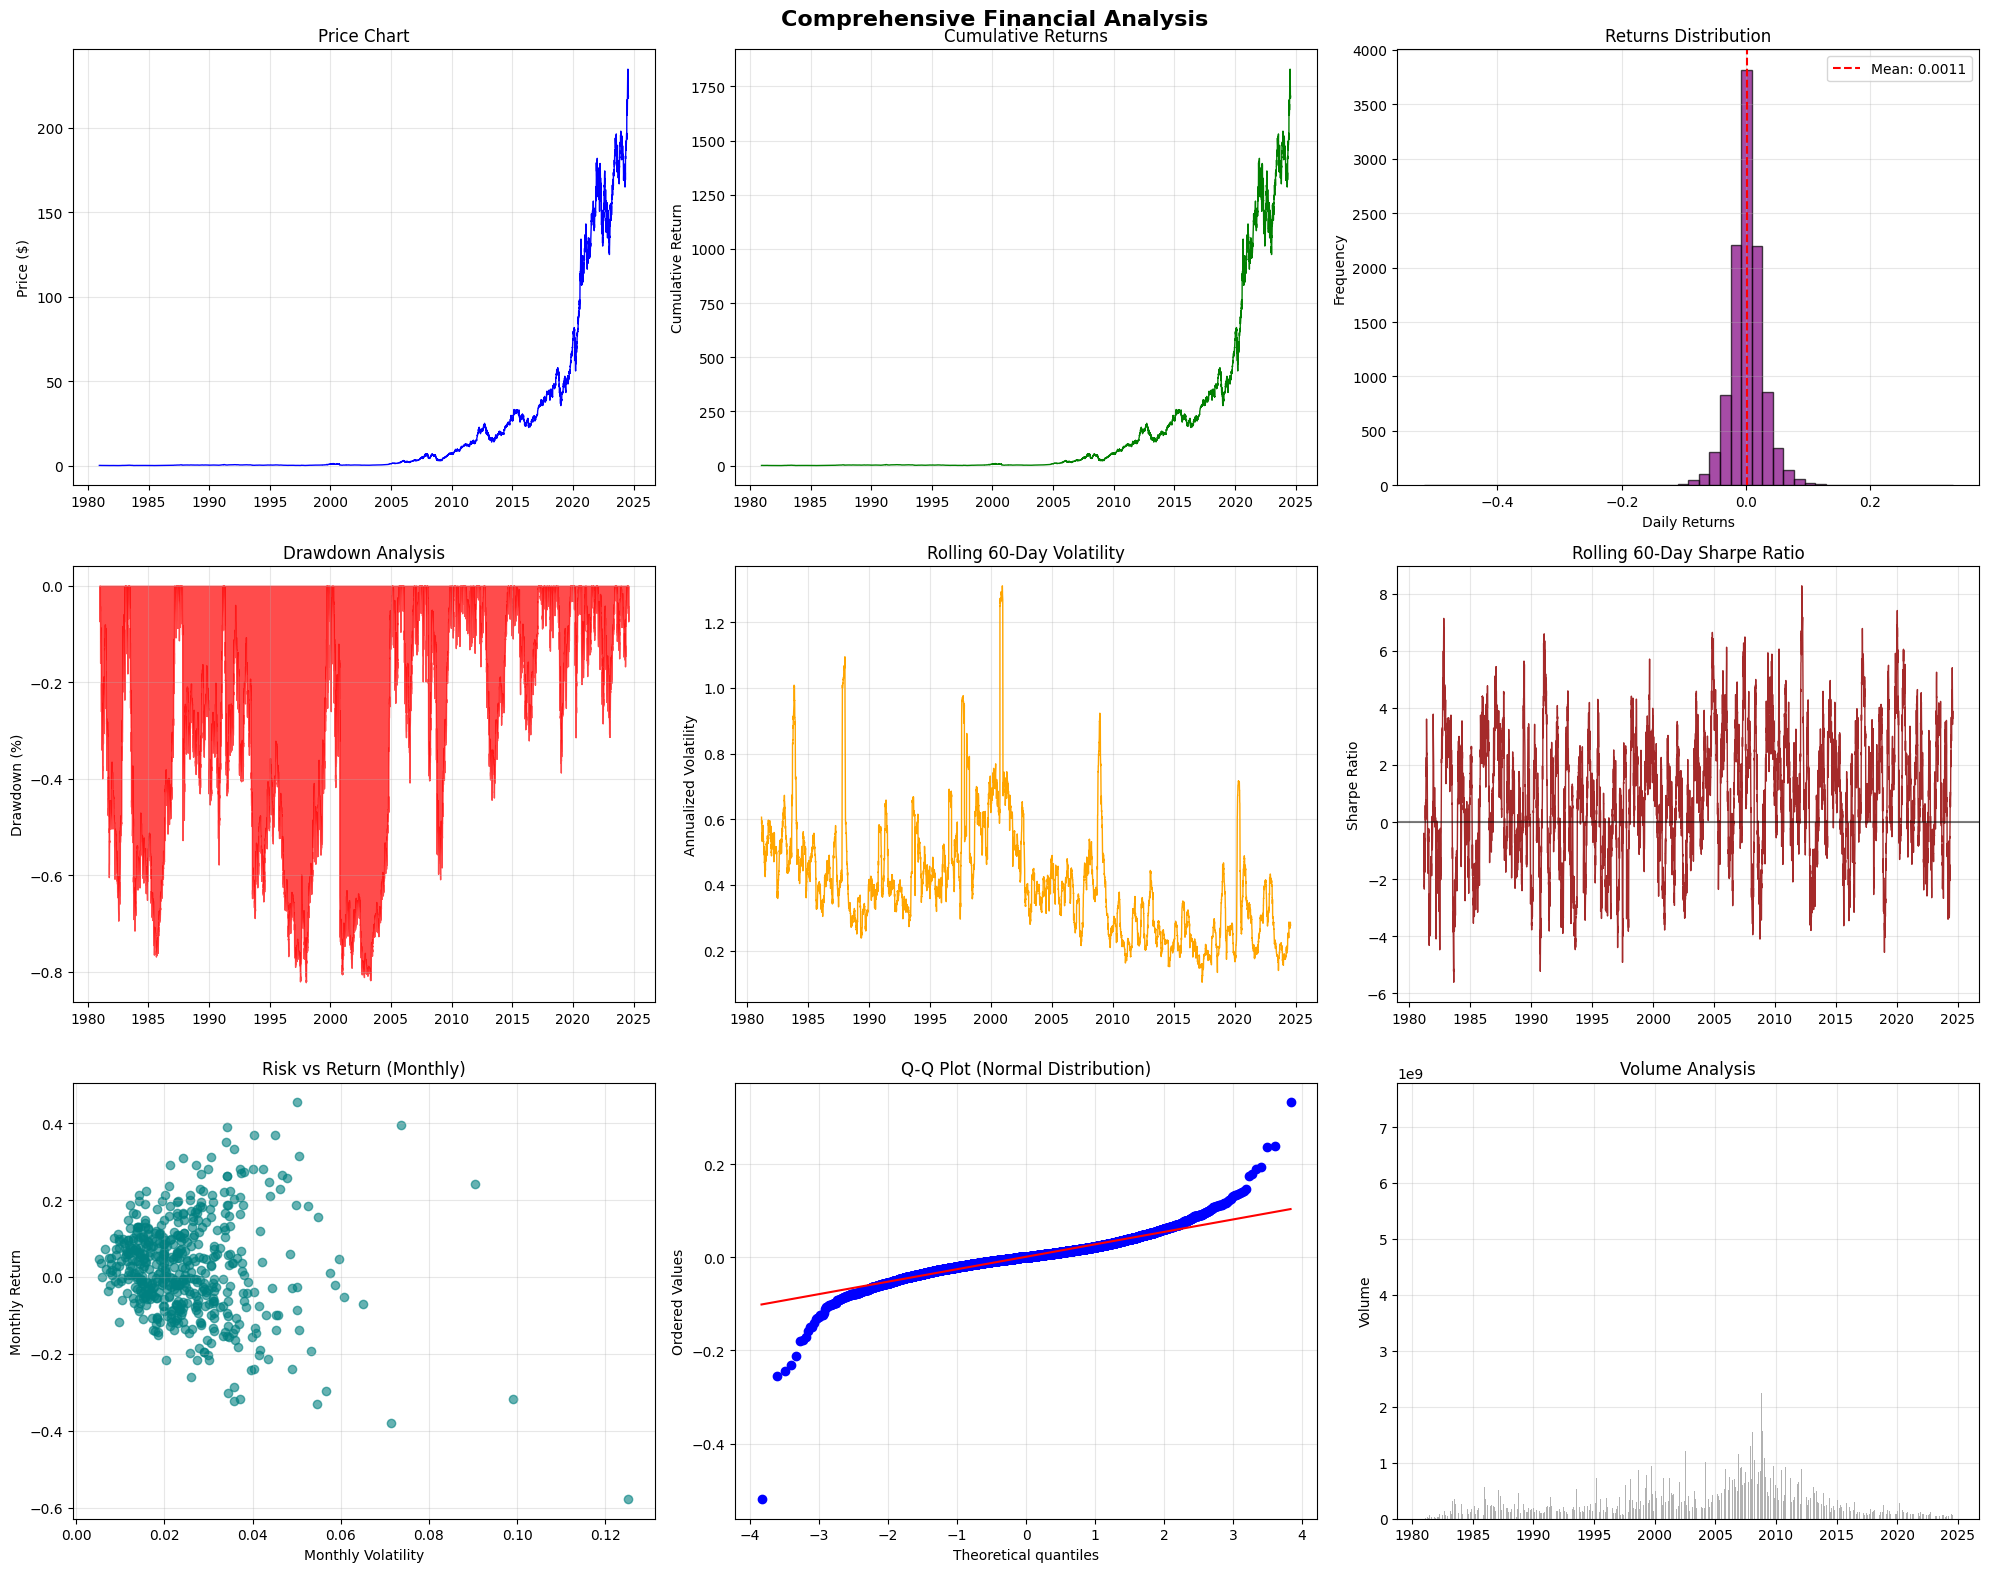

<Figure size 640x480 with 0 Axes>

In [13]:
# Create comprehensive financial analysis visualization
fig = finance_analyzer.plot_financial_analysis(figsize=(20, 16))
plt.suptitle(f'Financial Analysis - {selected_ticker}', fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## 📊 Step 4: Multi-Stock Comparison

In [14]:
# Analyze all stocks for comparison
all_stock_metrics = []

for ticker in data_loader.tickers:
    try:
        print(f"📊 Analyzing {ticker}...")
        stock_data_temp = data_loader.get_stock_data(ticker)
        
        if not stock_data_temp.empty:
            # Financial analysis
            finance_temp = FinancialMetricsAnalyzer(stock_data_temp.copy())
            metrics_temp = finance_temp.calculate_basic_metrics()
            
            # Add ticker
            metrics_temp['Ticker'] = ticker
            all_stock_metrics.append(metrics_temp)
            
    except Exception as e:
        print(f"❌ Error analyzing {ticker}: {str(e)}")

# Create comparison DataFrame
if all_stock_metrics:
    comparison_df = pd.DataFrame(all_stock_metrics)
    comparison_df.set_index('Ticker', inplace=True)
    
    print("✅ Multi-stock analysis complete!")
    print(f"📈 Analyzed {len(comparison_df)} stocks")
else:
    print("❌ No stock analysis completed")

📊 Analyzing AAPL...
Financial data prepared: 10998 records from 1980-12-12 00:00:00 to 2024-07-30 00:00:00
📊 Analyzing AMZN...
Financial data prepared: 6846 records from 1997-05-15 00:00:00 to 2024-07-30 00:00:00
📊 Analyzing GOOG...
Financial data prepared: 5020 records from 2004-08-19 00:00:00 to 2024-07-30 00:00:00
📊 Analyzing META...
Financial data prepared: 2926 records from 2012-12-12 00:00:00 to 2024-07-30 00:00:00
📊 Analyzing MSFT...
Financial data prepared: 9672 records from 1986-03-13 00:00:00 to 2024-07-30 00:00:00
📊 Analyzing NVDA...
Financial data prepared: 6421 records from 1999-01-22 00:00:00 to 2024-07-30 00:00:00
📊 Analyzing TSLA...
Financial data prepared: 3545 records from 2010-06-29 00:00:00 to 2024-07-30 00:00:00
✅ Multi-stock analysis complete!
📈 Analyzed 7 stocks


In [17]:
# Display comparison metrics
if 'comparison_df' in locals():
    print("📊 Stock Performance Comparison:")
    # Key metrics for comparison
    key_metrics = ['total_return', 'annualized_return', 'annualized_volatility',
                   'sharpe_ratio',  'current_price']
    comparison_display = comparison_df[key_metrics].round(4)
    comparison_display.columns = ['Total Return', 'Annual Return', 'Annual Volatility',
                                  'Sharpe Ratio', 'Current Price']
    display(comparison_display)

📊 Stock Performance Comparison:


,Total Return,Annual Return,Annual Volatility,Sharpe Ratio,Current Price
Ticker,,,,,
AAPL,1703.7404,0.1860,0.4428,0.3748,218.80
AMZN,1854.7555,0.3186,0.5624,0.5310,181.71
GOOG,67.7678,0.2363,0.3067,0.7053,171.86
META,15.7944,0.2745,0.3854,0.6604,463.19
MSFT,4349.0444,0.2439,0.3354,0.6677,422.92
NVDA,2528.0131,0.3594,0.6011,0.5646,103.73
TSLA,138.7781,0.4201,0.5694,0.7026,222.62


In [ ]:
# Visualization: Risk vs Return scatter plot
if 'comparison_df' in locals():
    plt.figure(figsize=(12, 8))
    
    x = comparison_df['annualized_volatility'] * 100
    y = comparison_df['annualized_return'] * 100
    
    plt.scatter(x, y, s=200, alpha=0.7, c=range(len(comparison_df)), cmap='viridis')
    
    # Add labels for each point
    for i, ticker in enumerate(comparison_df.index):
        plt.annotate(
            ticker, 
            (x.iloc[i], y.iloc[i]), 
            xytext=(5, 5), 
            textcoords='offset points',
            fontsize=10, 
            fontweight='bold'
        )
    
    plt.xlabel('Annualized Volatility (%)', fontsize=12)
    plt.ylabel('Annualized Return (%)', fontsize=12)
    plt.title('Risk vs Return Analysis', fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Add efficient frontier line (simplified)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Zero Return')
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print("💡 Interpretation:")
    print("- Top-left quadrant: Low risk, positive returns (ideal)")
    print("- Top-right quadrant: High risk, high returns")
    print("- Bottom areas: Negative or low returns")